In [1]:
from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise_array, generate_noise
from src.preprocessing import process_image, process_video, get_video, preprocess
from src.gradient_descent import find_default_params
from src.visualizer import visualize
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from tqdm import tqdm
plt.rcParams['image.cmap'] = 'gray'

# Import values

In [2]:
path = 'images/cheese_gel.avi'

In [3]:
# Parameters
# params = np.genfromtxt('parameters.csv', delimiter=",")

# Loss
# loss_all = np.genfromtxt('loss.csv', delimiter=",")

# Visualizations

## Pixel distributions

In [4]:
# path = 'images/cheese_gel.avi'

# im = process_video(path, threshold=0.17, smooth=2.62, skip_size=24)
# # shortening the video
# # im = im[]

# rows1 = np.flip(np.count_nonzero(im[0], axis=1))
# cols1 = np.count_nonzero(im[0], axis=0)

# rows2 = np.flip(np.count_nonzero(im[-1], axis=1))
# cols2 = np.count_nonzero(im[-1], axis=0)

# X_rows = np.arange(len(rows2))

# fig, ax = plt.subplots(1,2,figsize=(10,5))

# ax[0].set_title('Number of non-zero pixels by row')
# ax[0].barh(X_rows, rows2, color='steelblue')
# ax[0].set_xlabel("Number of elements in row")
# ax[0].set_ylabel('Row #')

# X_cols = np.arange(len(cols2))
# ax[1].set_title('Number of non-zero pixels by column')
# ax[1].bar(X_cols, cols2, color='steelblue')
# ax[1].set_ylabel("Number of elements in column")
# ax[1].set_xlabel('Column #')

# plt.tight_layout()
# # plt.savefig("distributions.png", dpi=1100)
# plt.show()

In [5]:
# fig, ax = plt.subplots(1,3, figsize=(15,5))

# ax[0].imshow(im[0] > 0)
# ax[0].set_title('Frame #0')
# ax[1].imshow(im[3] > 0)
# ax[1].set_title('Frame #72')
# ax[2].imshow(im[7] > 0)
# ax[2].set_title('Frame #144')

## Difference in threshold on shape relation measures

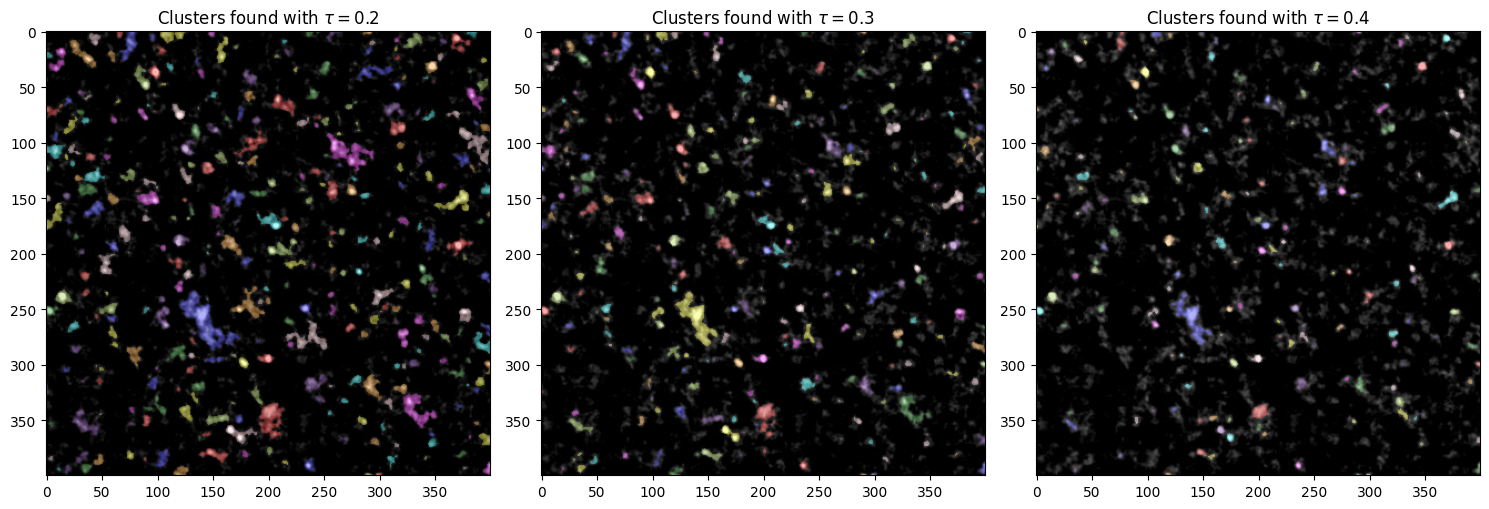

In [9]:
im = get_video(path, skip_size=239)[1]
im = im[300:700,300:700]

t1, t2, t3 = 0.2, 0.3, 0.4
smooth = 1

im_low = preprocess(im, threshold=t1)
im_mid = preprocess(im, threshold=t2)
im_high = preprocess(im, threshold=t3)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(label2rgb(im_low, image=im, bg_label=0))
ax[1].imshow(label2rgb(im_mid, image=im, bg_label=0))
ax[2].imshow(label2rgb(im_high, image=im, bg_label=0))

# ax[0].imshow(label2rgb(im_low))
# ax[1].imshow(label2rgb(im_mid))
# ax[2].imshow(label2rgb(im_high))


ax[0].set_title(r'Clusters found with $\tau = 0.2$')
ax[1].set_title(r'Clusters found with $\tau = 0.3$')
ax[2].set_title(r'Clusters found with $\tau = 0.4$')

plt.tight_layout()
plt.show()

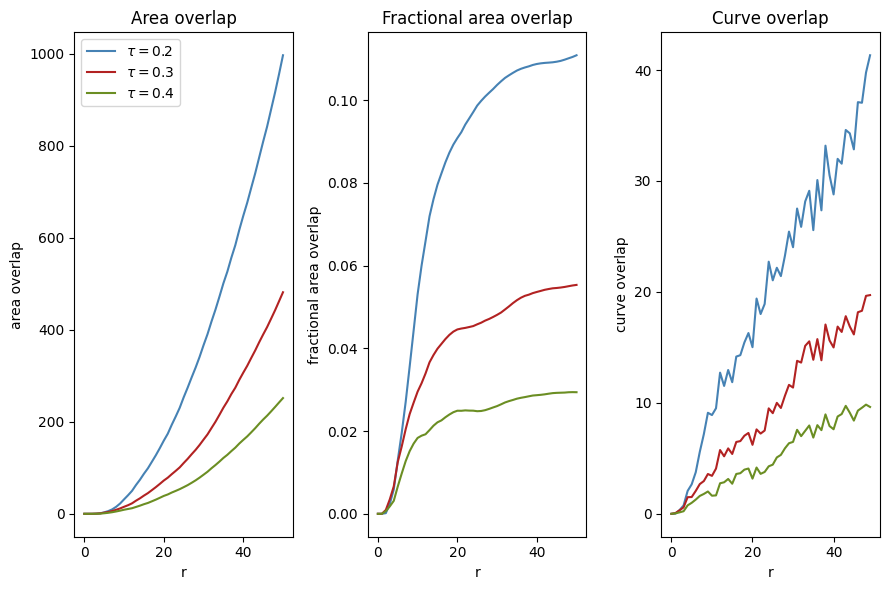

In [10]:
F1, G1 = analyse_image(im_low, L=50)
F2, G2 = analyse_image(im_mid, L=50)
F3, G3 = analyse_image(im_high, L=50)
# F1 = np.linalg.norm(F1)
# F2 = np.linalg.norm(F2)
# F3 = np.linalg.norm(F3)
# G1 = np.linalg.norm(G1)
# G2 = np.linalg.norm(G2)
# G3 = np.linalg.norm(G2)
# print(F1.shape)
F_list, G_list = [F1, F2, F3], [G1, G2, G3]
# F_list, G_list = np.linalg.norm(F_list, axis=1), np.linalg.norm(G_list, axis=1)

# print(F_list.shape)
fig, ax = plt.subplots(1,3, figsize=(9,6))

colors = ['steelblue', 'firebrick', 'olivedrab']
labels = [r'$\tau = 0.2$', r'$\tau = 0.3$', r'$\tau = 0.4$']

for i in range(len(F_list)):
    ax[0].plot(F_list[i], color=colors[i], label=labels[i])
    ax[0].set_xlabel('r')
    ax[0].set_ylabel('area overlap')
    ax[0].set_title('Area overlap')
    ax[1].plot(F_list[i]/G_list[i], color=colors[i])
    ax[1].set_xlabel('r')
    ax[1].set_ylabel('fractional area overlap')
    ax[1].set_title('Fractional area overlap')
    ax[2].plot((F_list[i])[1:]-(F_list[i])[:-1], color=colors[i])
    ax[2].set_xlabel('r')
    ax[2].set_ylabel('curve overlap')
    ax[2].set_title('Curve overlap')

ax[0].legend()
plt.tight_layout()
plt.show()